In [1]:
# Wide style
from ipython_tools import handler
handler.style()


# load the needed python and basf2 libraries
import glob
from array import array
import sys
from ROOT import TTree, TFile, TH2F, TCanvas, TGraph, TH1F, TF1, TH1D
import math
import os
import time
import numpy
import numpy as np
import root_pandas

import pandas as pd
import scipy.special
from scipy.integrate import quad

%matplotlib inline

import matplotlib
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

import importlib #to reload modules

#matplotlib.rcParams.update({'font.size': 22})

Welcome to JupyROOT 6.24/06


In [2]:
from matplotlib import gridspec
from scipy.integrate import quad

In [3]:
# options for the style
params = {'font.size': 30,
          'axes.labelsize': 40,
          'axes.titlesize': 40,
          'axes.labelpad': 20.,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30,
          'axes.titlepad': 1,
          'axes.labelpad': 1,
          'legend.fontsize': 30
}

matplotlib.rcParams.update(params)

# option for grid
plt.rc('grid', linestyle="--", color='grey', alpha=0.3)

In [4]:
root_files = glob.glob('/home/benjamin/xtracker/examples/Trigger_*.root')

In [8]:
def EffPlot(df, var, trg, rng, bns, fsize = (25, 13), clr='tab:blue', 
            lbl=None, ttl=None, xlb=None, ylb='Efficiency'):
    
    xmin=rng[0]
    xmax=rng[1]
    
    width=(xmax-xmin)/bns
    
    eff_x = []
    eff_y = []
    err_eff_x = []
    err_eff_y = []
    
    for i in range(bns-1):
        low_lim = xmin + i*width 
        high_lim = xmin + (i+1)*width
        
        num = len(df[var][df[var] > low_lim][df[var] <= high_lim][(df[trg] == 1) & (df['p'] > 0.01)])
        den = len(df[var][df[var] > low_lim][df[var] <= high_lim][(df['p'] > 0.01)])
        
        x = (high_lim + high_lim)/2.
        y = 0
        ey = 0
        if den !=0 and den > 5:
            y = num/den
            ey = y*(1-y)/np.sqrt(den)
        eff_x.append(x)
        eff_y.append(y)
        err_eff_x.append(0)
        err_eff_y.append(ey)        
    
    f = plt.figure(figsize=fsize)
    
    plt.plot(eff_x, eff_y, label=lbl, color=clr, marker='o')
    plt.fill_between(eff_x, np.array(eff_y)-np.array(err_eff_y), np.array(eff_y)+np.array(err_eff_y), color=clr, alpha=0.4)

    plt.xlabel(xlb, labelpad=20)
    plt.ylabel(ylb, labelpad=20)


    plt.xlim(xmin, xmax)
    plt.ylim(0, 1)
    
    plt.grid(True)
    if lbl != None:
        plt.legend()
    

    plt.tight_layout()
    
    return f, eff_x, eff_y, err_eff_y

In [9]:
var_eff = ['phi', 'z', 'pt',]
var_lbl = ['$\phi$', 'z [cm]', 'p$_t$ [GeV/c]']
trg = ['vtx', 'l1', 'hie', 'c4']       
var_bns = [50, 50, 50, 50]
var_rng = [(-np.pi, np.pi), (-15., 15.), (0., 1.5), ]

mean efficiency is: 0.0 for vtx in Trigger_bg.root
mean efficiency is: 0.0 for l1 in Trigger_bg.root
mean efficiency is: 0.0 for hie in Trigger_bg.root
mean efficiency is: 0.0 for c4 in Trigger_bg.root
mean efficiency is: 0.0 for vtx in Trigger_bg.root
mean efficiency is: 0.0 for l1 in Trigger_bg.root
mean efficiency is: 0.0 for hie in Trigger_bg.root
mean efficiency is: 0.0 for c4 in Trigger_bg.root
mean efficiency is: 0.0 for vtx in Trigger_bg.root
mean efficiency is: 0.0 for l1 in Trigger_bg.root
mean efficiency is: 0.0 for hie in Trigger_bg.root
mean efficiency is: 0.0 for c4 in Trigger_bg.root


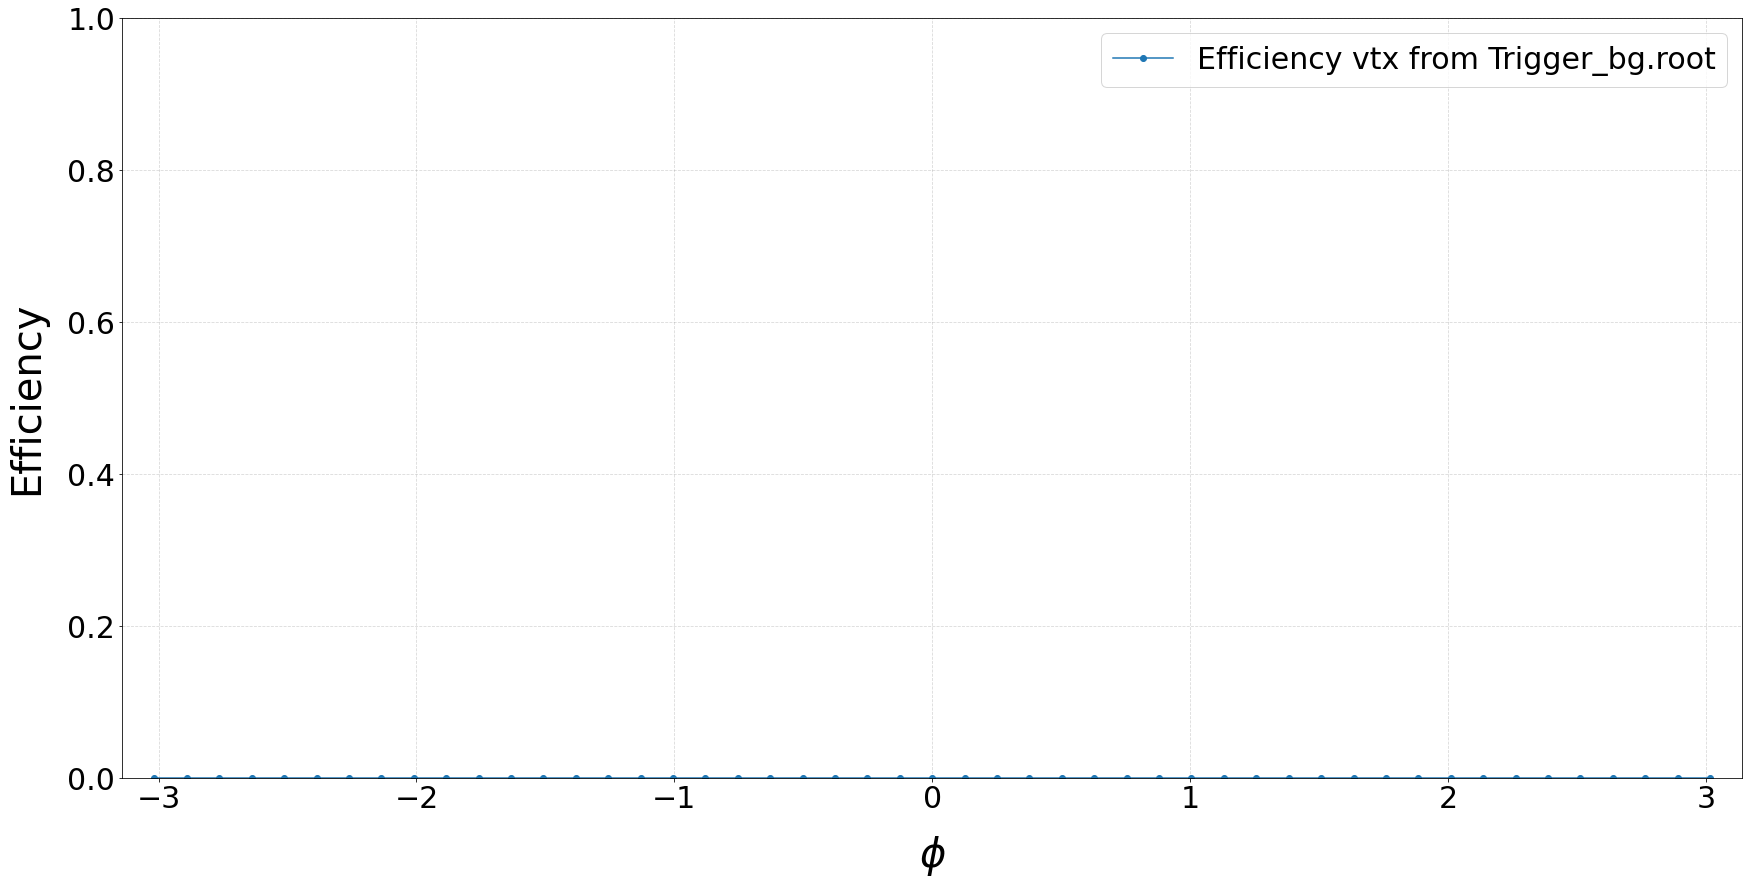

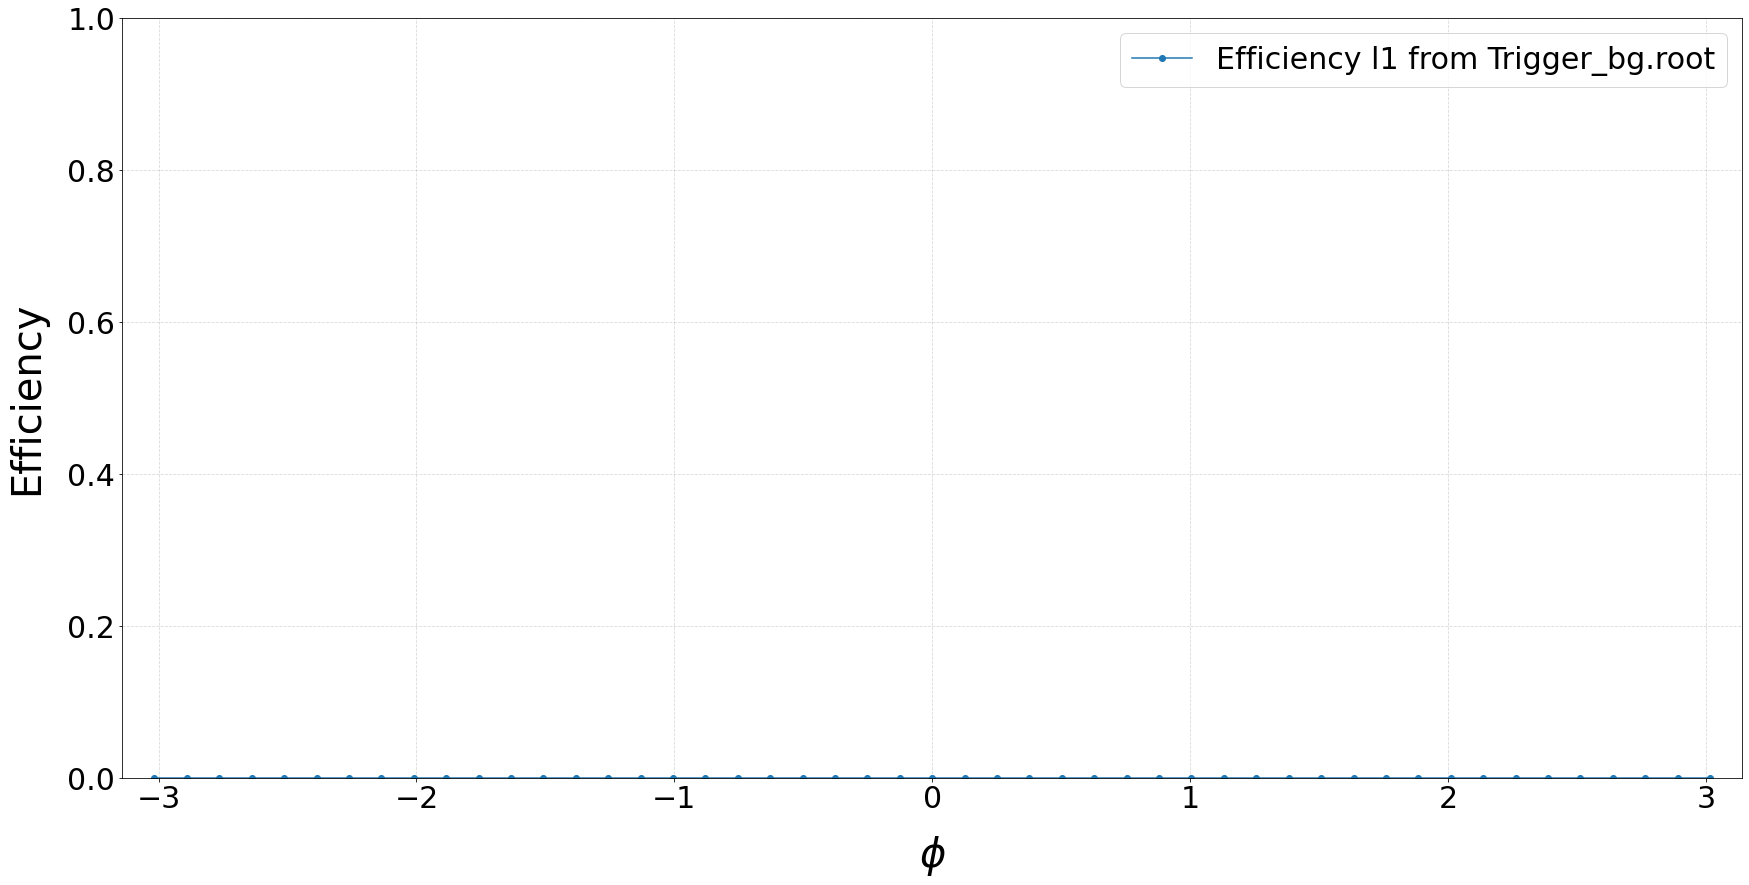

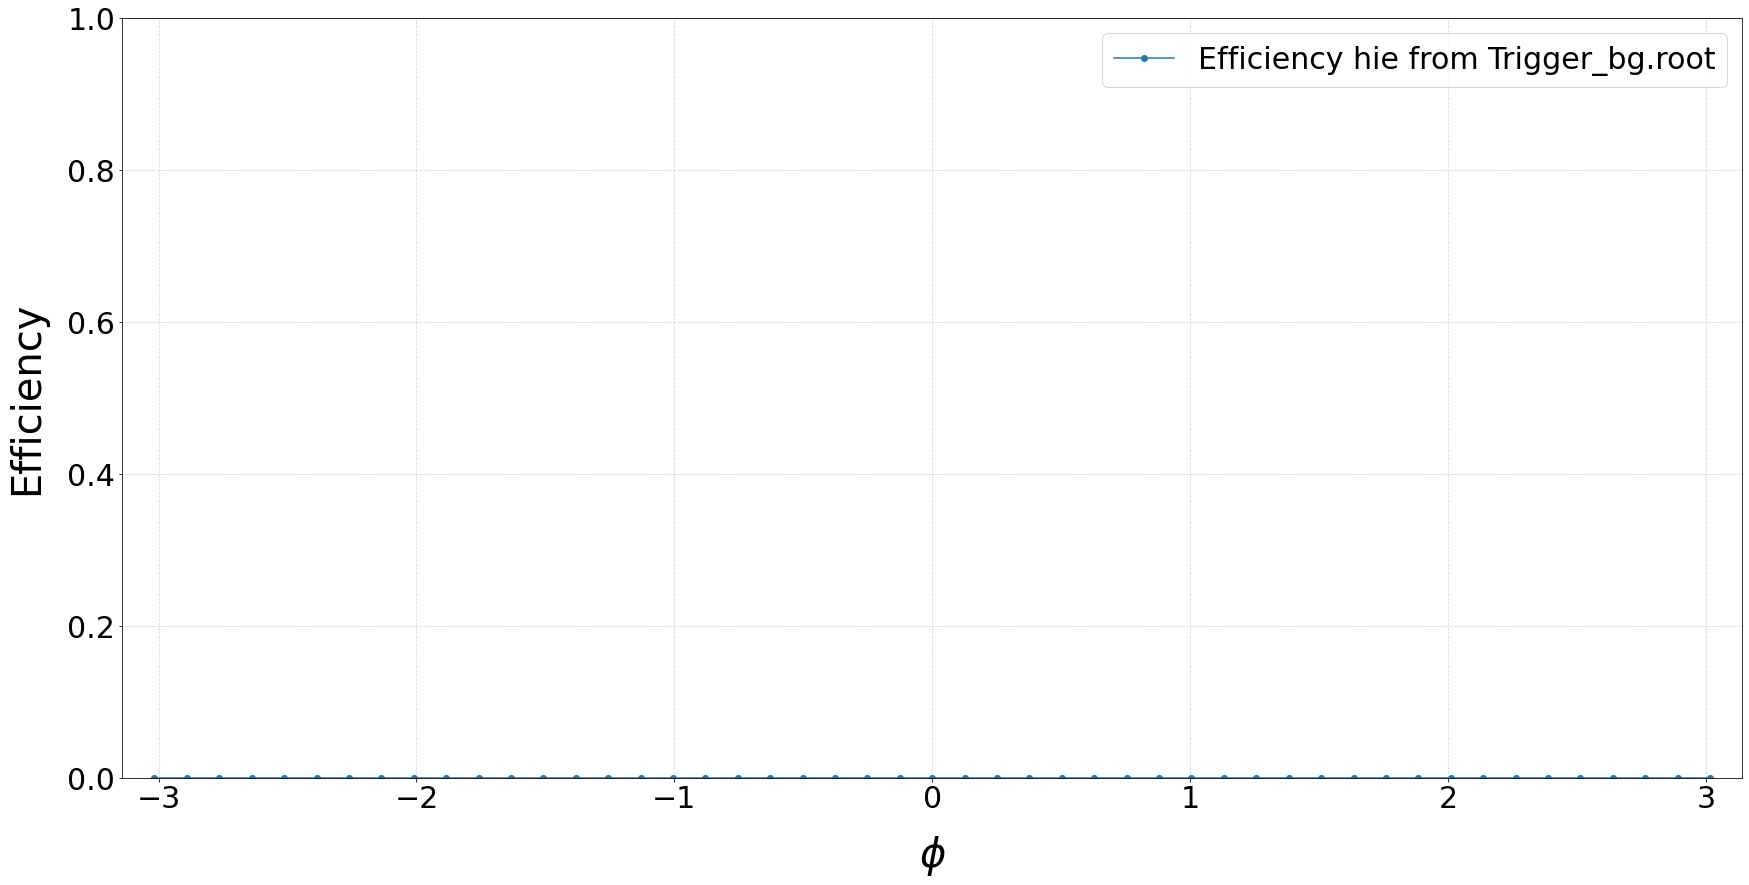

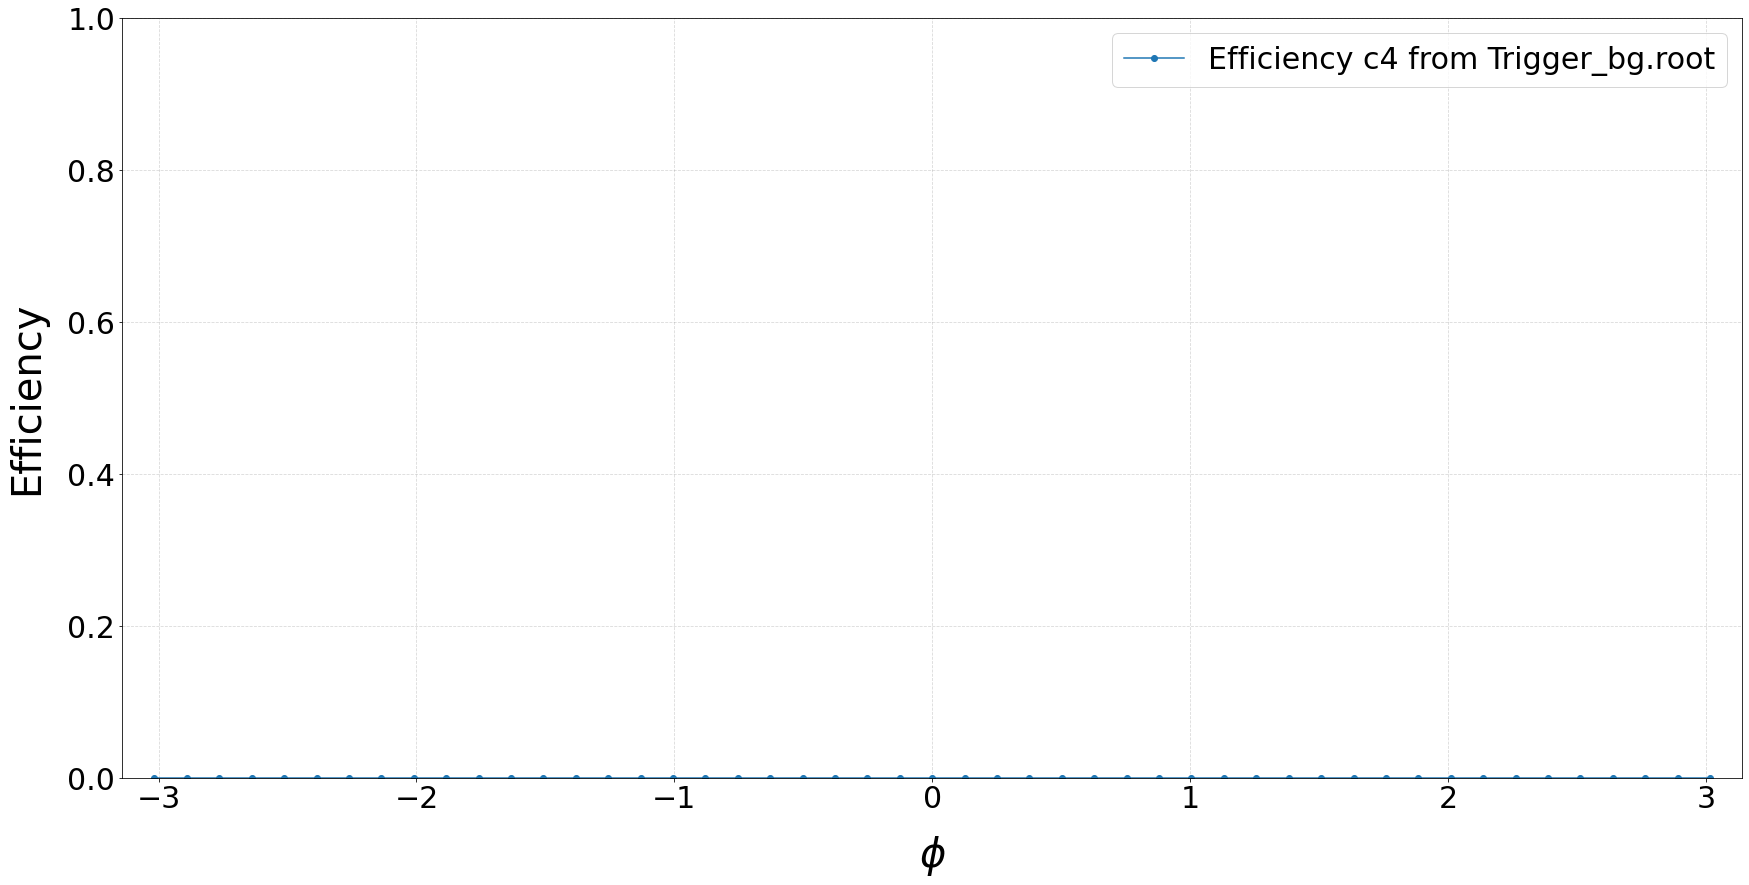

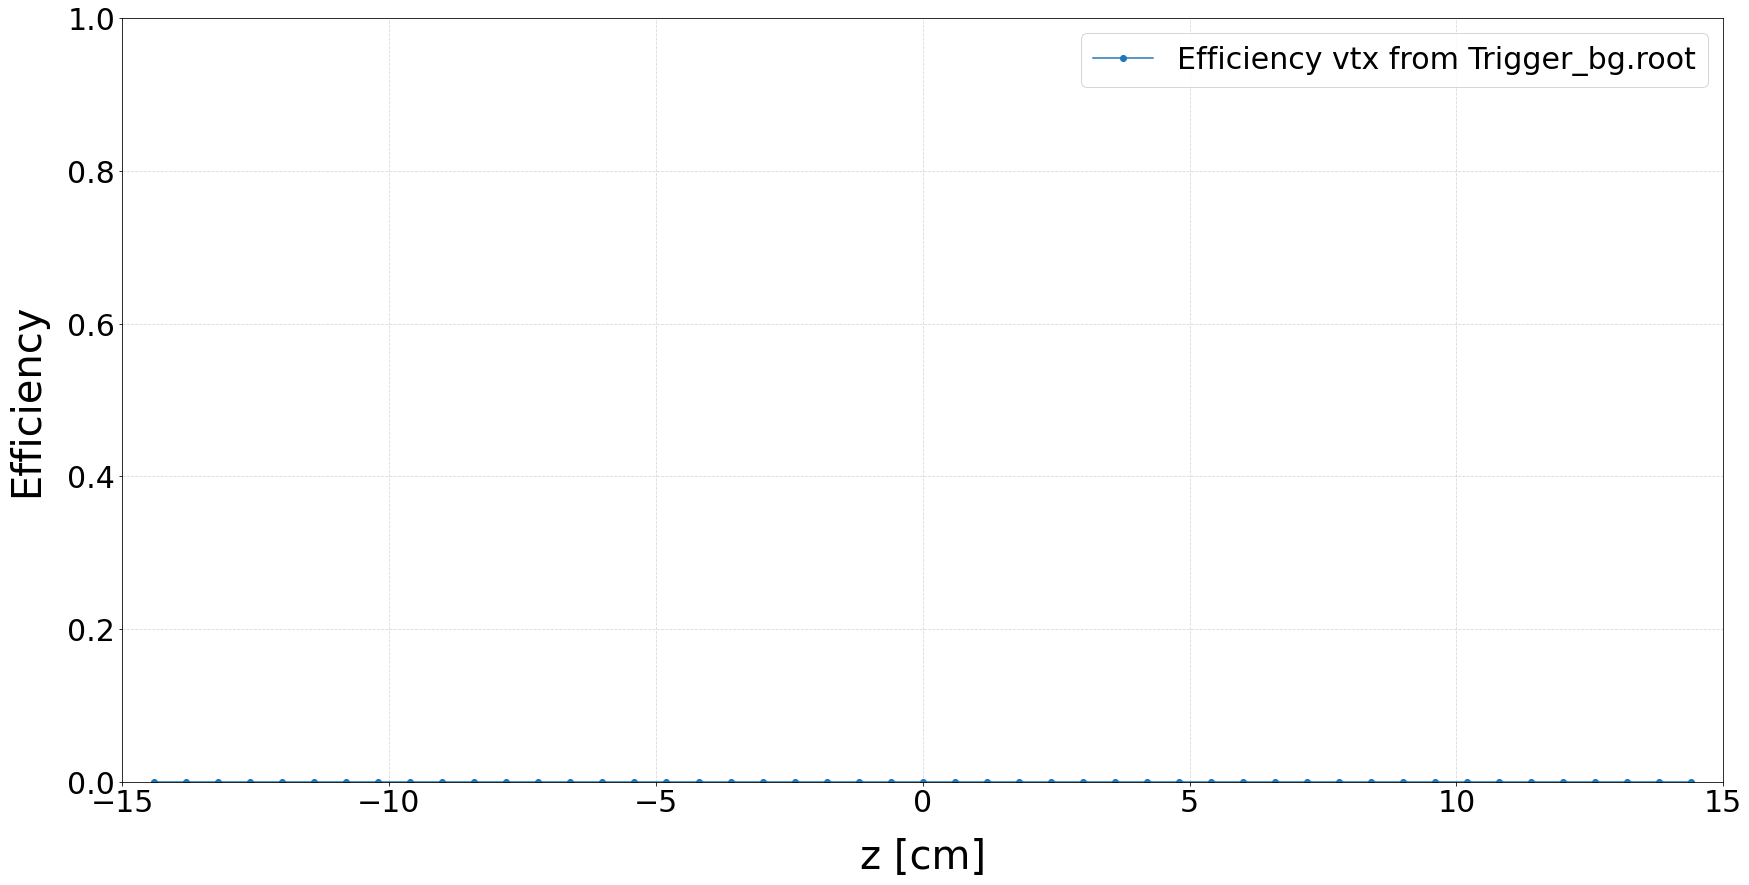

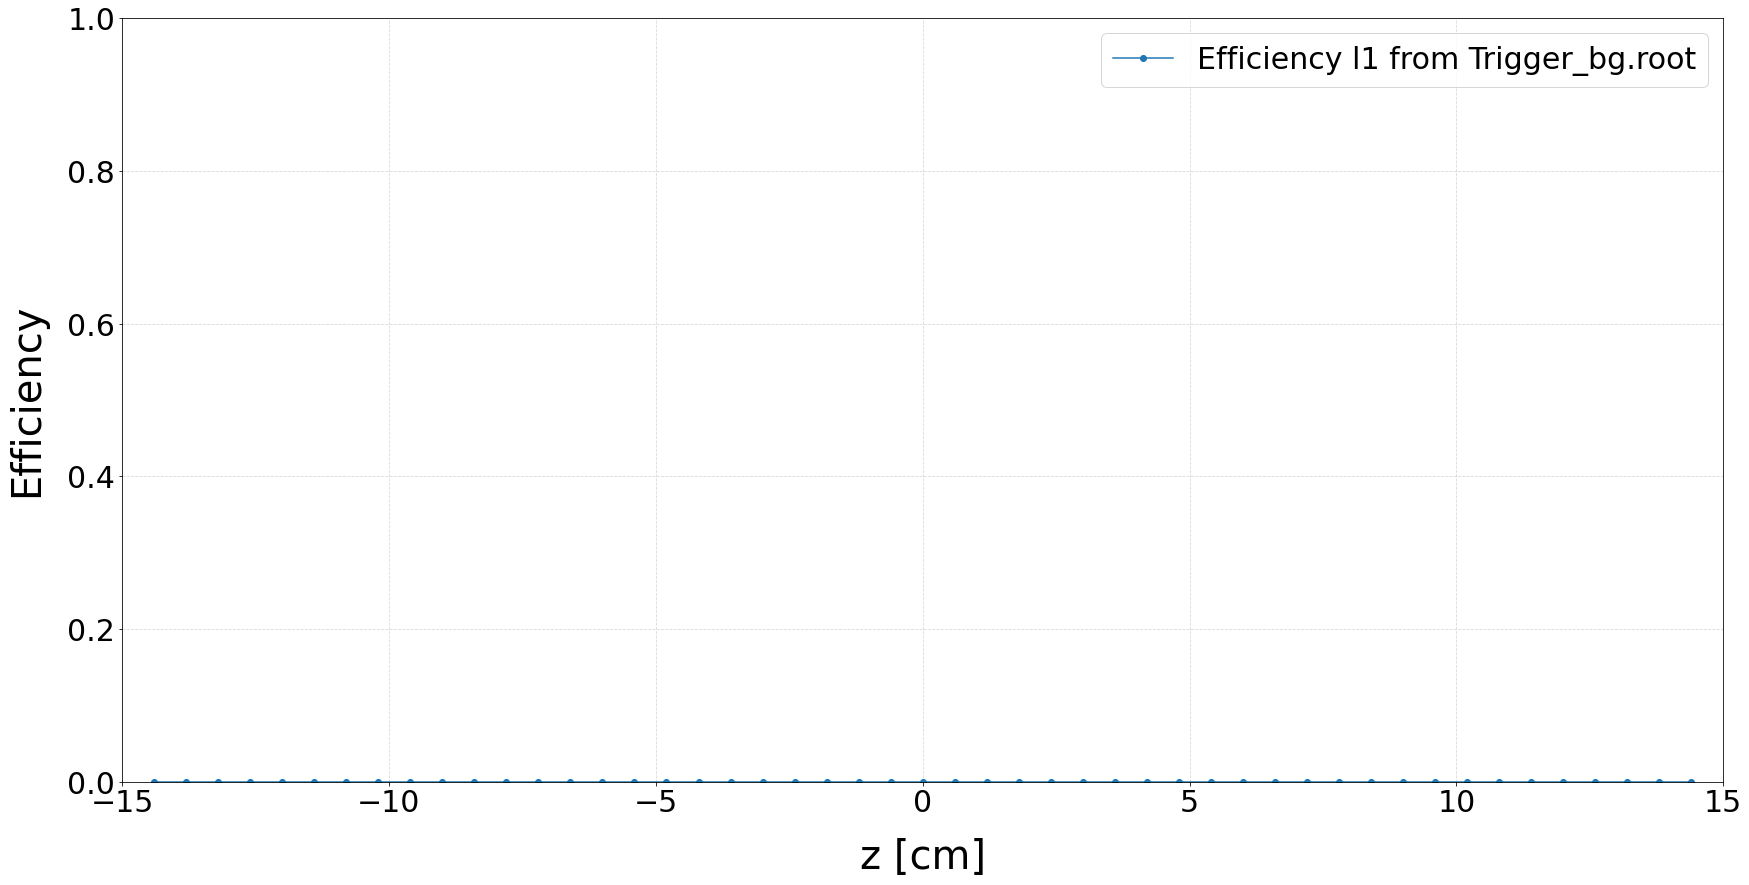

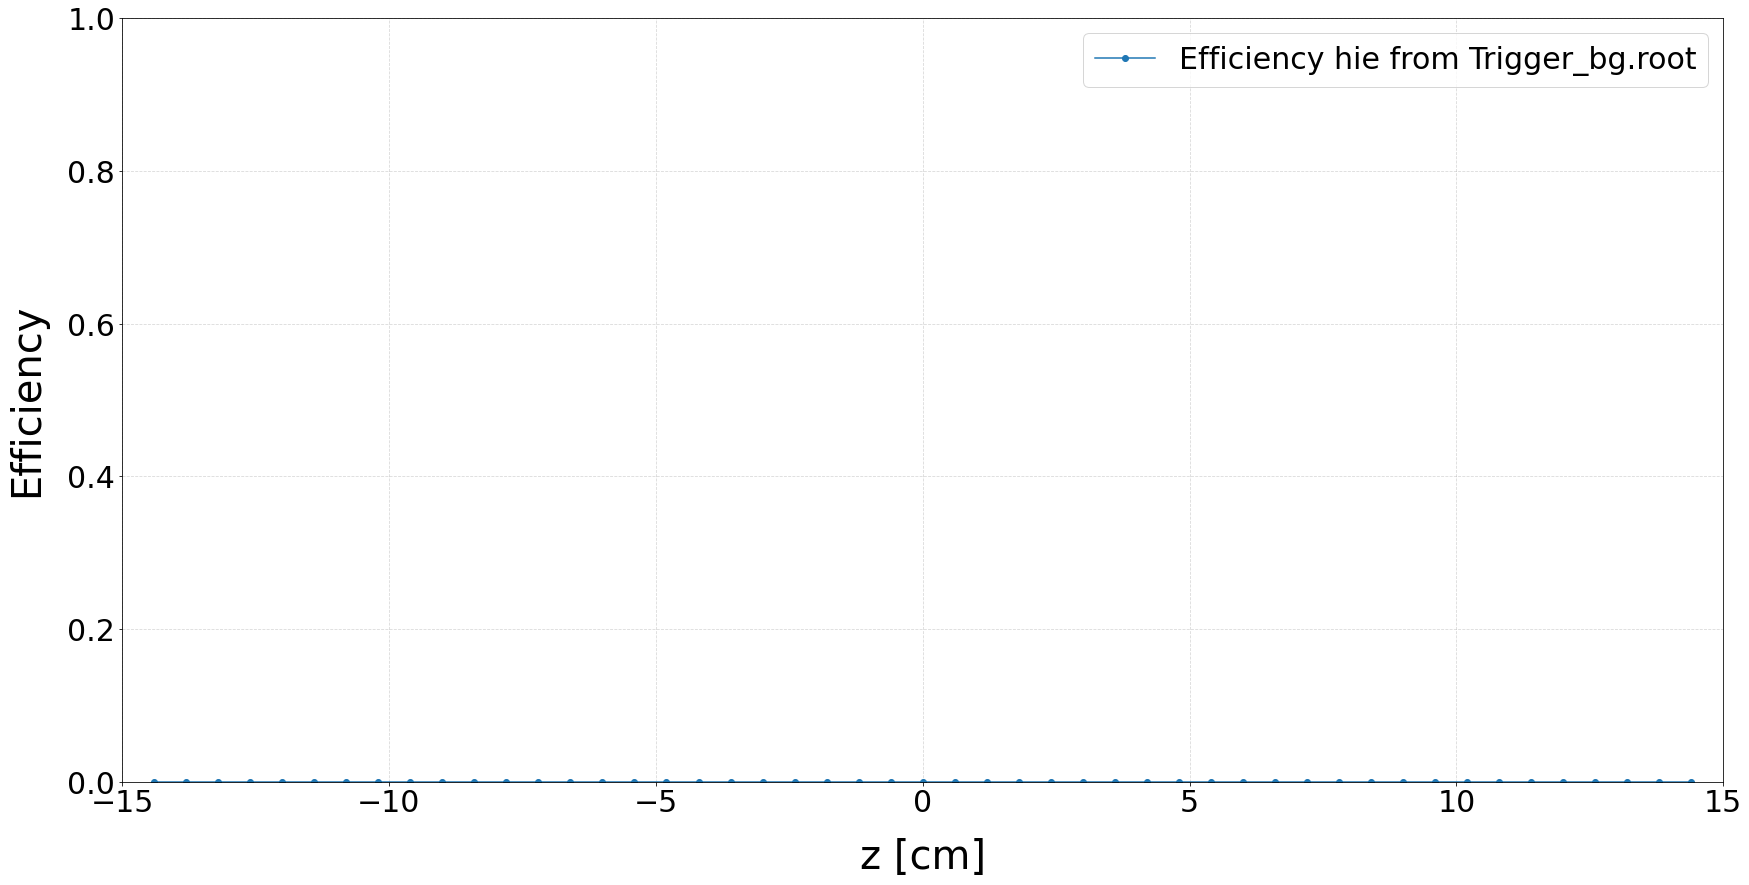

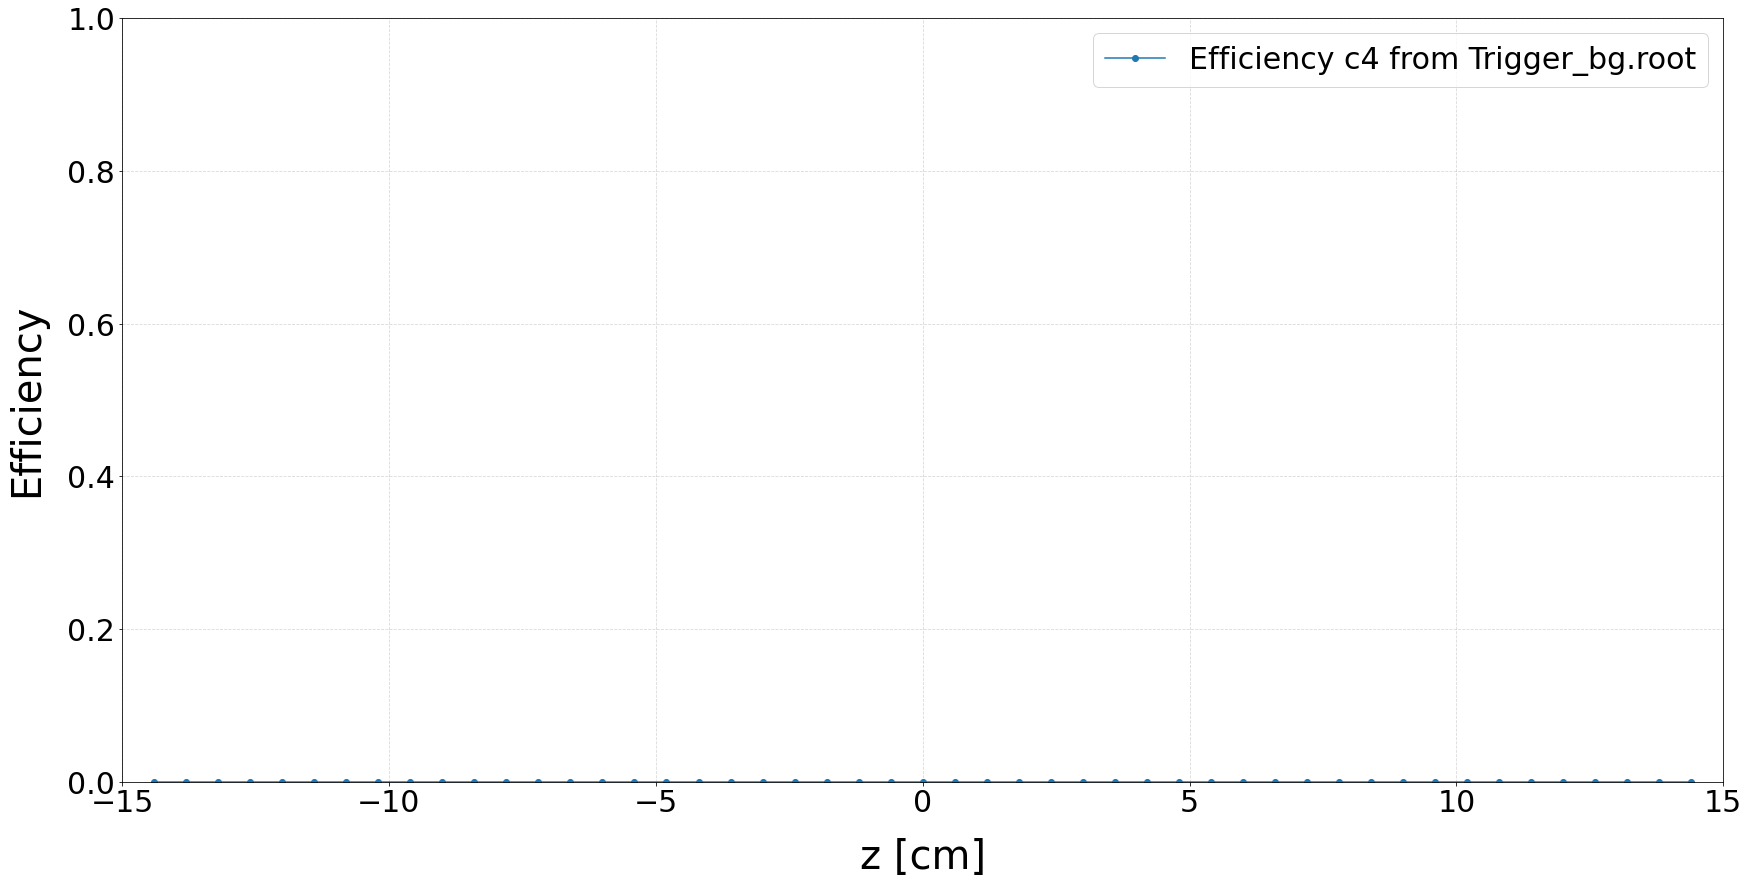

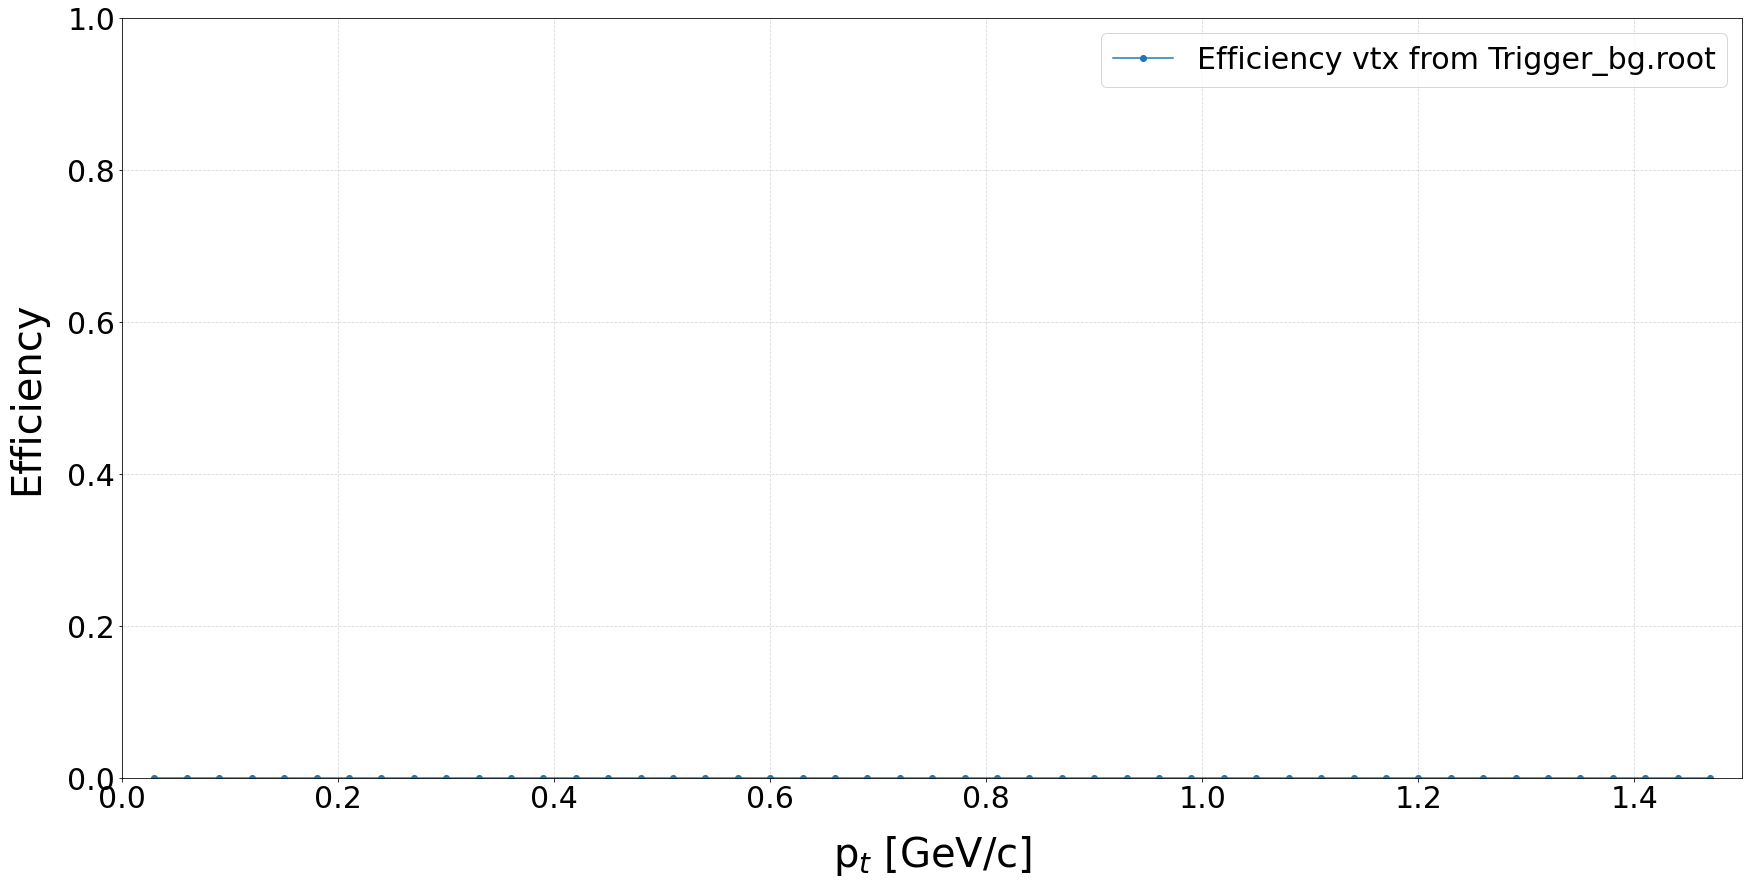

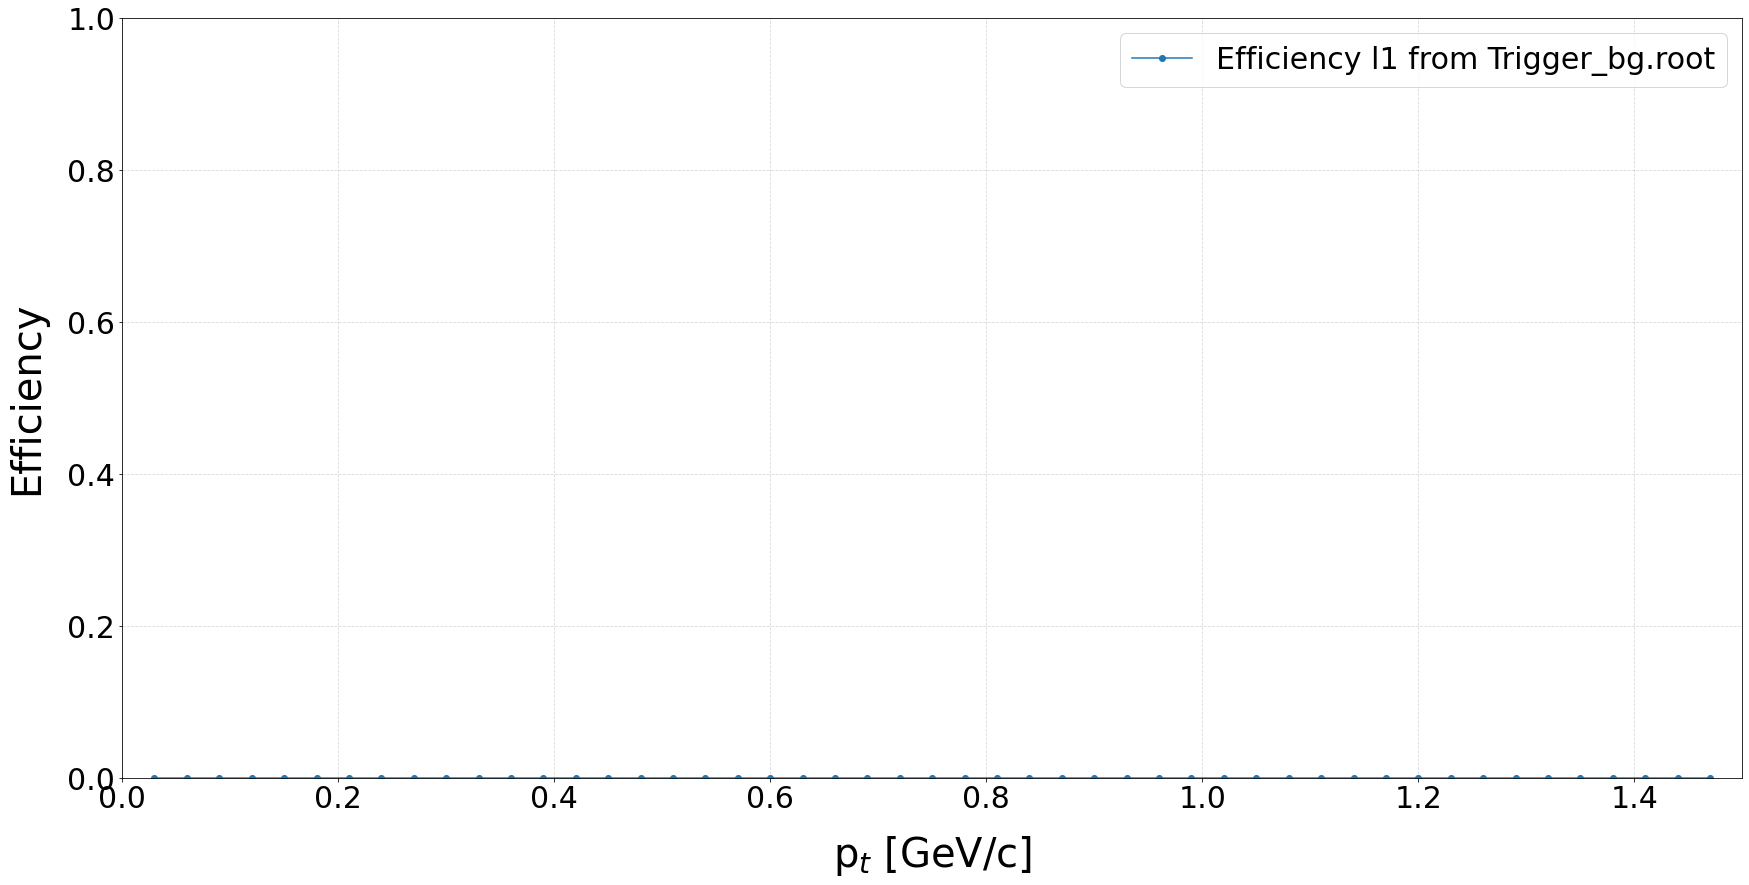

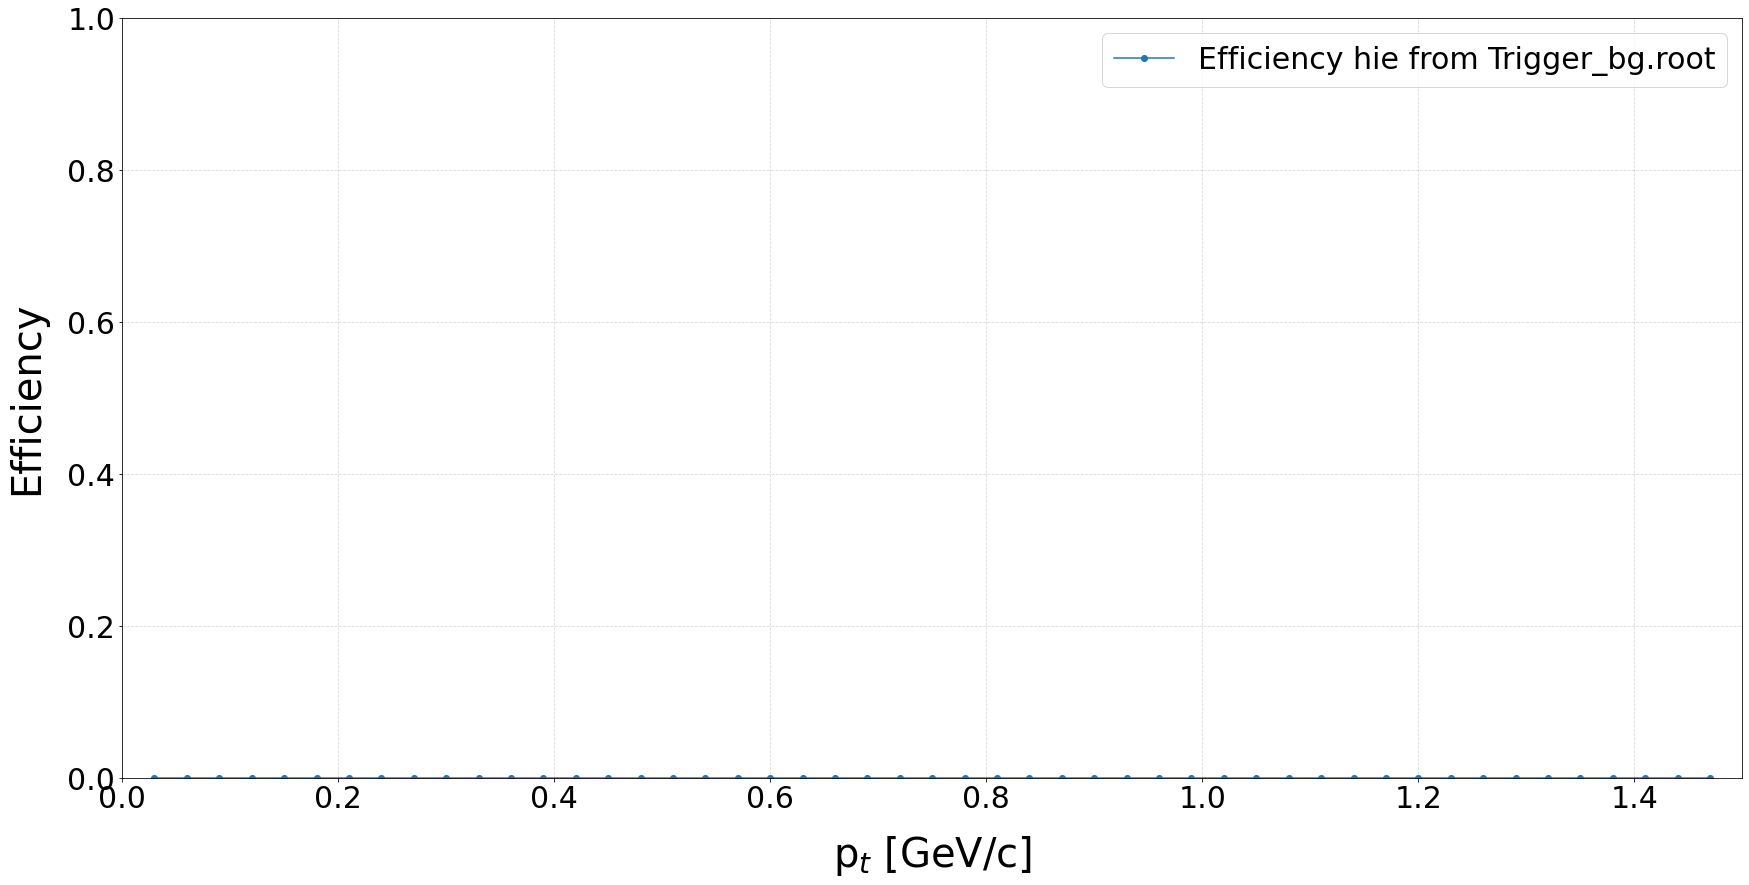

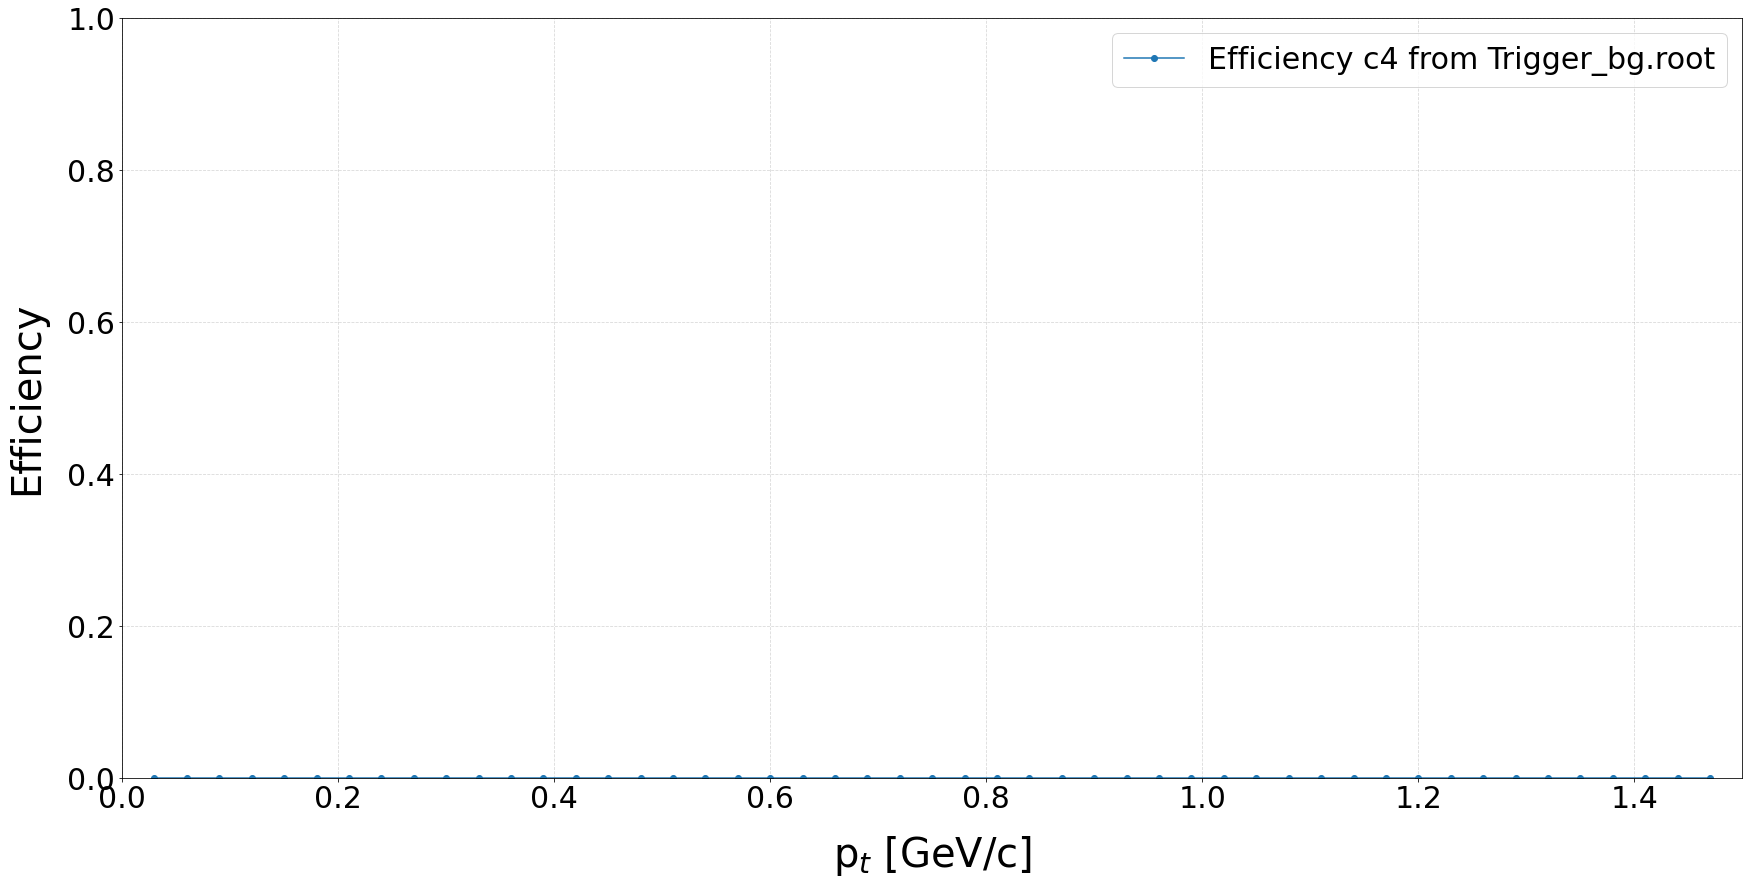

In [10]:
for file_path in root_files:

    df = root_pandas.read_root(file_path, key='tree')

    

    for i in range(len(var_eff)):
        for j in range(len(trg)):

            fg, ex, ey, eey = EffPlot(df, var_eff[i], trg[j],
                                  rng=var_rng[i], bns=var_bns[i], clr='tab:blue', 
                                  lbl='Efficiency {} from {}'.format(trg[j], os.path.basename(file_path)), ttl=None, xlb=var_lbl[i], ylb='Efficiency')
            
            print('mean efficiency is: {} for {} in {}'.format( np.mean(ey), trg[j], os.path.basename(file_path) ))
            